<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/ets_ipc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: ETS para el índice IPC
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 28 de octubre 2024 <br>

* * *

<br>
<br>

## Intro

A menudo, las empresas necesitan realizar previsiones automáticas de un gran número de series temporales univariantes. Es habitual tener más de mil líneas de productos que necesitan previsiones al menos mensuales. Incluso cuando se requiere un número menor de previsiones, puede que no haya nadie con la formación adecuada en el uso de modelos de series temporales para elaborarlas. En estas circunstancias, un algoritmo automático de previsión es una herramienta esencial. Los algoritmos automáticos de previsión deben determinar un modelo de series temporales adecuado, estimar los parámetros y calcular las previsiones. Deben ser robustos ante patrones de series temporales inusuales y aplicables a un gran número de series sin intervención del usuario. Los algoritmos de previsión automática más populares se basan en modelos de suavización exponencial o ARIMA.

# ETS para el índice IPC

Imagina que tienes un portafolio de acciones que sigue el comportamiento del Índice de Precios y Cotizaciones. Quieres pronosticar el valor de tu portafolio 3 meses en el futuro.

- Utiliza las 30 acciones el indice por separado.
- Los datos al cierre mensuales desde el 2015.
- Para utilizar *autoets* necesitas los datos en el formato correcto. https://nixtlaverse.nixtla.io/statsforecast/docs/models/autoets.html#read-data
- Divide tus datos en entrenamiento y prueba.
- Utiliza autoets para ajustar y evaluar tu modelo (selecciona una métrica de error que permita comparar diferentes escalas).
- Por medio de la métrica de error, visualiza la serie que mejor se ajusta y la que peor se ajusta.

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
ticker = yf.Tickers(["LABB.MX", "VESTA.MX", "ORBIA.MX", "GFNORTEO.MX", "BBAJIOO.MX", "MEGACPO.MX",
                     "AC.MX", "GCC.MX", "GENTERA.MX", "CUERVO.MX", "AMXB.MX", "GCARSOA1.MX",
                     "KIMBERA.MX", "GMEXICOB.MX", "CHDRAUIB.MX", "GRUMAB.MX", "KOFUBL.MX",
                     "RA.MX", "BOLSAA.MX", "ALSEA.MX", "TLEVISACPO.MX", "Q.MX", "BIMBOA.MX",
                     "PINFRA.MX", "GAPB.MX", "ASURB.MX", "OMAB.MX", "CEMEXCPO.MX"])
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  28 of 28 completed


Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,...,KOFUBL.MX,LABB.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702621,37.795326,11.671399,154.705338,NaN,34.200203,15.430020,11.531771,37.656048,NaN,...,NaN,19.345699,38.958515,38.346149,33.284714,130.751801,NaN,56.302017,88.730606,23.547867
2015-02-01 00:00:00+00:00,70.285492,43.193321,11.671399,161.849319,NaN,37.858749,16.780146,13.125944,44.382275,NaN,...,NaN,13.299150,39.022587,39.573215,34.902489,138.726151,NaN,57.645134,92.414055,23.328480
2015-03-01 00:00:00+00:00,69.477180,42.006325,11.124301,162.236115,NaN,38.791321,16.133081,12.536795,41.835011,NaN,...,NaN,11.775289,42.517673,41.436161,32.001621,126.094299,NaN,56.418175,91.677376,23.035959
2015-04-01 00:00:00+00:00,69.892464,43.400566,11.737051,171.416748,NaN,36.944115,18.360481,13.335611,41.735298,NaN,...,NaN,14.749672,45.450413,42.735741,35.294964,136.695755,NaN,63.874287,101.554527,23.328480
2015-05-01 00:00:00+00:00,70.519699,43.626663,11.744345,179.291840,NaN,37.374527,16.991688,12.993212,42.756989,NaN,...,NaN,13.535471,46.048355,40.197922,37.479797,130.000076,NaN,61.688999,105.901917,22.910902


In [ ]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)

In [ ]:
#data = data.to_period('M')

In [ ]:
data = data.melt(ignore_index=False)

In [ ]:
data.head()

,Ticker,value
Date,,
2015-01-01,AC.MX,65.702621
2015-02-01,AC.MX,70.285492
2015-03-01,AC.MX,69.477180
2015-04-01,AC.MX,69.892464
2015-05-01,AC.MX,70.519699


In [ ]:
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,ds,y,unique_id
0,2015-01-01,65.702621,AC.MX
1,2015-02-01,70.285492,AC.MX
2,2015-03-01,69.477180,AC.MX
3,2015-04-01,69.892464,AC.MX
4,2015-05-01,70.519699,AC.MX


In [ ]:
df.dropna(inplace=True)

In [ ]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

In [ ]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.8 MB/s eta 0:00:00


In [ ]:
train.shape, test.shape

((2573, 3), (336, 3))

In [ ]:
df.head()

,ds,y,unique_id
0,2015-01-01,65.702606,AC.MX
1,2015-02-01,70.285484,AC.MX
2,2015-03-01,69.477188,AC.MX
3,2015-04-01,69.892448,AC.MX
4,2015-05-01,70.519684,AC.MX


In [ ]:
from statsforecast.models import AutoETS
from statsforecast import StatsForecast

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoETS(season_length=season_length, model='ZZZ')]

In [ ]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [ ]:
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoETS])

In [ ]:
sf.fitted_[0,0].model_.keys()

dict_keys(['loglik', 'aic', 'bic', 'aicc', 'mse', 'amse', 'fit', 'residuals', 'components', 'm', 'nstate', 'fitted', 'states', 'par', 'sigma2', 'n_params', 'method', 'actual_residuals'])

In [ ]:
sf.fitted_[0,0].model_['method']

'ETS(M,A,N)'

In [ ]:
sf.fitted_[0,0].model_['amse']

43.27413436138229

In [ ]:
sf.fitted_[0,0].predict_in_sample()

{'fitted': array([ 65.6608603 ,  66.69632782,  71.14175937,  70.53738712,
         70.9129735 ,  71.53039383,  68.59250114,  74.04612988,
         73.22709749,  72.92656683,  80.58786481,  79.86909369,
         80.08063784,  82.79646519,  84.48440811,  90.96708669,
         90.73247879,  94.97793092, 101.32279631,  93.86995883,
         91.05076822,  89.60630076,  91.20940482,  84.59004749,
         83.97141915,  87.2142971 ,  87.34755251, 100.32482157,
        107.29651214, 103.43742213, 107.04967015, 103.89039363,
        102.88468706,  98.11694622,  96.08358745, 100.19434815,
        106.57889287, 106.1684073 , 103.00248281,  99.04115869,
        101.54322961,  94.47269301,  97.74996578,  98.98891479,
         94.34637715,  96.69393467,  82.52301174,  84.25671896,
         87.84188327,  89.0851745 ,  87.19928029,  86.70709832,
         86.29192263,  85.81743091,  85.09881067,  83.57728619,
         85.91390649,  87.29583426,  87.97173535,  84.91752786,
         84.11422389,  87.5755

In [ ]:
test_hat = sf.forecast(fitted = True, h = horizon)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
train_hat = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
fitted = sf.fit_predict(df=train, h = horizon)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
fitted.head()

,ds,AutoETS
unique_id,,
AC.MX,2023-02-01,155.512651
AC.MX,2023-03-01,156.450636
AC.MX,2023-04-01,157.388621
AC.MX,2023-05-01,158.326606
AC.MX,2023-06-01,159.264591


In [ ]:
test_hat.head()

,ds,AutoETS
unique_id,,
AC.MX,2023-02-01,155.512651
AC.MX,2023-03-01,156.450636
AC.MX,2023-04-01,157.388621
AC.MX,2023-05-01,158.326606
AC.MX,2023-06-01,159.264591


In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    for stock in stocks:
      y_true_stock = y_true[y_true['unique_id'] == stock]['y']
      y_pred_stock = y_pred[test_hat.index == stock]['AutoETS']
      print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}")
      errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock)

    return errors_df

In [ ]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())

MAPE score for AC.MX: 7.9004153704740565
MAPE score for ALSEA.MX: 30.63529597845907
MAPE score for AMXB.MX: 9.162428573358222
MAPE score for ASURB.MX: 9.520857173541062
MAPE score for BBAJIOO.MX: 7.885180199443971
MAPE score for BIMBOA.MX: 8.528558259617185
MAPE score for BOLSAA.MX: 10.141927307320092
MAPE score for CEMEXCPO.MX: 29.30670624965368
MAPE score for CHDRAUIB.MX: 16.559518775044
MAPE score for CUERVO.MX: 11.604975934682544
MAPE score for GAPB.MX: 11.260779413418659
MAPE score for GCARSOA1.MX: 29.410283714468683
MAPE score for GCC.MX: 11.273305971266916
MAPE score for GENTERA.MX: 7.597338027353332
MAPE score for GFNORTEO.MX: 14.144415424888512
MAPE score for GMEXICOB.MX: 18.758693985056585
MAPE score for GRUMAB.MX: 11.276644184840729
MAPE score for KIMBERA.MX: 13.349098853316379
MAPE score for KOFUBL.MX: 9.728624300206988
MAPE score for LABB.MX: 16.026163924934856
MAPE score for MEGACPO.MX: 18.672258592161292
MAPE score for OMAB.MX: 16.08324038742988
MAPE score for ORBIA.MX: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

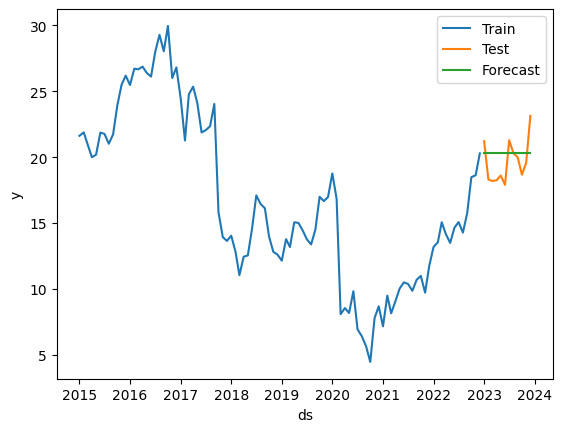

In [ ]:
sns.lineplot(train[train['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'GENTERA.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()

In [ ]:
sf.fitted_[14,0].model_['method']

'ETS(M,N,N)'

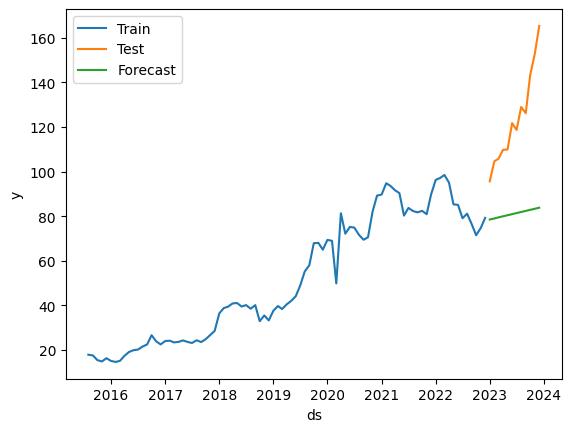

In [ ]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()

In [ ]:
sf.fitted_[24,0].model_['method']

'ETS(M,A,N)'